The aim of this workbook is to explore the Integrated Gradients implementation.

### Modell trainieren

100%|██████████| 8/8 [00:11<00:00,  1.42s/it]


Final metrics: 
Test-Loss: 0.620311004725116
Test-Accuracy: 0.7694566813509545
Train-Loss: 0.6268332472712919
Train-Accuracy: 0.8004224834680382
103
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=7, bias=True)
  )
)


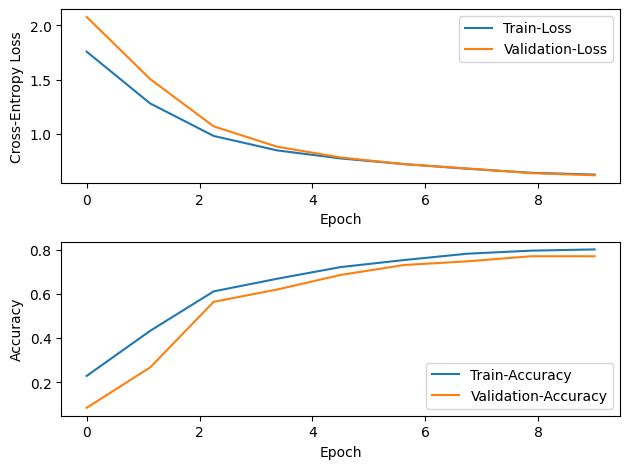

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([4])

# Instanzweises testen der IG scores

In [2]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)
print(true_y)
print(pred_y)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print(attribution_score)

tensor([0., 0., 0., 1., 0., 0., 0.])
tensor([1.5622e-03, 9.2467e-19, 1.0923e-05, 7.9610e-01, 3.6359e-04, 7.0962e-02,
        1.3100e-01])
(tensor([-0.0157, -0.0325, -0.0274, -0.0381,  0.0434,  0.0912, -0.0170, -0.0372,
        -0.0078,  0.0810,  0.1199,  0.0288,  0.2967,  0.1568,  0.0193,  0.1161]), 3)


c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


### Testen des Completeness Axioms durch Veränderung der num_steps

num_steps = 30

In [3]:
from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)
evaluator.completeness_deltas_statistics(n_steps=30)

0it [00:00, ?it/s]

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:13, 99.24it/s] 

Mittlere absolute Abweichung:  1.08e-03
Maximum der betragsmäßigen Abweichung;  1.02e-01
Minimum der betragsmäßigen Abweichung: -9.59e-02


num_steps = 50

In [4]:
evaluator.completeness_deltas_statistics(n_steps=50)

1362it [00:23, 58.23it/s]

Mittlere absolute Abweichung:  7.61e-04
Maximum der betragsmäßigen Abweichung;  6.05e-02
Minimum der betragsmäßigen Abweichung: -5.94e-02


num_steps = 100

In [5]:
evaluator.completeness_deltas_statistics(n_steps=100)

1362it [00:44, 30.31it/s]

Mittlere absolute Abweichung:  3.71e-04
Maximum der betragsmäßigen Abweichung;  3.03e-02
Minimum der betragsmäßigen Abweichung: -2.72e-02


Log Odds test

In [6]:
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator

am_eval = AttributionMethodsEvaluator()

TypeError: AttributionMethodsEvaluator.__init__() missing 1 required positional argument: 'model'